In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_FILE_SAMPLE

In [2]:
df = pd.read_excel(HISTORICAL_FILE_SAMPLE, keep_default_na=False)
#reads projects from Excel file

len(df)
df.head()

,PROJECTS,COMMITS,Ignite,PostGIS,Snowflake,MarkLogic-NoSql,Virtuoso-Sql,RiakKV,Informix,PostgreSQL,...,Realm,Ehcache,AmazonRedshift,MS SQL Server,Hive,Hazelcast,Teradata,Elasticsearch,Ignite-NoSql,Redis
0,Activiti,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Activiti,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Activiti,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,5,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Combinando as heuristicas dos databases Multimodelos
df["Join_Ignite-Sql"] = df["Ignite"] +  df["Ignite-Sql"]
df["Join_Ignite-NoSql"] = df["Ignite"] +  df["Ignite-NoSql"]
df["Join_MarkLogic-Sql"] = df["MarkLogic"] +  df["MarkLogic-Sql"]
df["Join_MarkLogic-NoSql"] = df["MarkLogic"] +  df["MarkLogic-NoSql"]
df["Join_Virtuoso-Sql"] = df["Virtuoso"] +  df["Virtuoso-Sql"]
df["Join_Virtuoso-NoSql"] = df["Virtuoso"] +  df["Virtuoso-NoSql"]
df

,PROJECTS,COMMITS,Ignite,PostGIS,Snowflake,MarkLogic-NoSql,Virtuoso-Sql,RiakKV,Informix,PostgreSQL,...,Teradata,Elasticsearch,Ignite-NoSql,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,Activiti,2,1,0,0,0,0,0,0,1,...,0,0,0,0,2,1,0,0,0,0
2,Activiti,3,1,0,0,0,0,0,0,1,...,0,0,1,0,2,2,0,0,0,0
3,Activiti,4,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,Activiti,5,1,0,0,0,0,0,0,1,...,0,0,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,zaproxy,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,zaproxy,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,zaproxy,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,zaproxy,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2 = df
df2.drop(["Ignite", "Ignite-Sql","Ignite-NoSql","MarkLogic","MarkLogic-Sql","MarkLogic-NoSql",
"Virtuoso","Virtuoso-Sql","Virtuoso-NoSql"], axis=1, inplace=True)
df2

,PROJECTS,COMMITS,PostGIS,Snowflake,RiakKV,Informix,PostgreSQL,GoogleBigQuery,H2,SapAdaptiveServer,...,Hazelcast,Teradata,Elasticsearch,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,Activiti,2,0,0,0,0,1,0,1,0,...,0,0,0,0,2,1,0,0,0,0
2,Activiti,3,0,0,0,0,1,0,1,0,...,0,0,0,0,2,2,0,0,0,0
3,Activiti,4,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,Activiti,5,0,0,0,0,1,0,1,0,...,0,0,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,zaproxy,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,zaproxy,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,zaproxy,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,zaproxy,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df2['Join_Ignite-Sql']= df2['Join_Ignite-Sql'].replace([2,1],[1,0])
df2['Join_Ignite-NoSql']= df2['Join_Ignite-NoSql'].replace([2,1],[1,0])
df2['Join_MarkLogic-Sql']= df2['Join_MarkLogic-Sql'].replace([2,1],[1,0])
df2['Join_MarkLogic-NoSql']= df2['Join_MarkLogic-NoSql'].replace([2,1],[1,0])
df2['Join_Virtuoso-Sql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2['Join_Virtuoso-NoSql']= df2['Join_Virtuoso-Sql'].replace([2,1],[1,0])
df2

,PROJECTS,COMMITS,PostGIS,Snowflake,RiakKV,Informix,PostgreSQL,GoogleBigQuery,H2,SapAdaptiveServer,...,Hazelcast,Teradata,Elasticsearch,Redis,Join_Ignite-Sql,Join_Ignite-NoSql,Join_MarkLogic-Sql,Join_MarkLogic-NoSql,Join_Virtuoso-Sql,Join_Virtuoso-NoSql
0,Activiti,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Activiti,3,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,Activiti,4,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,zaproxy,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,zaproxy,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,zaproxy,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,zaproxy,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# trecho para substituir caracter espaço com replace, mas não funcionou
#df2.columns = [col.strip() for col in df2.columns.tolist()]
#print(df2.columns)
#df2.columns.str.replace(' ', '_')
#Para resolver o erro:"AttributeError: 'Pandas' object has no attribute 'column'" devido as colunas com espaço ou hifen entre os caracteres
df2.rename(columns={'MS Access': 'MS_Access', 'IBM DB2': 'IBM_DB2','Cosmos BD':'Cosmos_BD','MS SQL Server':'MS_SQL_Server'}, inplace=True)
df2.rename(columns={'Join_Ignite-Sql':'Join_Ignite_Sql','Join_Ignite-NoSql':'Join_Ignite_NoSql','Join_MarkLogic-Sql':'Join_MarkLogic_Sql',
                    'Join_MarkLogic-NoSql':'Join_MarkLogic_NoSql','Join_Virtuoso-Sql':'Join_Virtuoso_Sql','Join_Virtuoso-NoSql':'Join_Virtuoso_NoSql'}, inplace=True)
print(df2.columns)


Index(['PROJECTS', 'COMMITS', 'PostGIS', 'Snowflake', 'RiakKV', 'Informix',
       'PostgreSQL', 'GoogleBigQuery', 'H2', 'SapAdaptiveServer', 'SQLite',
       'Netezza', 'GoogleCloudDatastore', 'InfluxDB', 'Solr', 'FileMaker',
       'MS_Access', 'Vertica', 'Memcached', 'Aerospike', 'Firebird', 'Etcd',
       'ClickHouse', 'FirebaseRealtime', 'Impala', 'IBM_DB2', 'MariaDB',
       'HBase', 'MongoDB', 'MicrosoftAzureTableStorage', 'OrientDB', 'Neo4j',
       'Oracle', 'CouchDB', 'DynamoDB', 'Couchbase', 'MySQL', 'Cassandra',
       'Cosmos_BD', 'SapHana', 'Realm', 'Ehcache', 'AmazonRedshift',
       'MS_SQL_Server', 'Hive', 'Hazelcast', 'Teradata', 'Elasticsearch',
       'Redis', 'Join_Ignite_Sql', 'Join_Ignite_NoSql', 'Join_MarkLogic_Sql',
       'Join_MarkLogic_NoSql', 'Join_Virtuoso_Sql', 'Join_Virtuoso_NoSql'],
      dtype='object')


In [7]:
print(df2.columns)

Index(['PROJECTS', 'COMMITS', 'PostGIS', 'Snowflake', 'RiakKV', 'Informix',
       'PostgreSQL', 'GoogleBigQuery', 'H2', 'SapAdaptiveServer', 'SQLite',
       'Netezza', 'GoogleCloudDatastore', 'InfluxDB', 'Solr', 'FileMaker',
       'MS_Access', 'Vertica', 'Memcached', 'Aerospike', 'Firebird', 'Etcd',
       'ClickHouse', 'FirebaseRealtime', 'Impala', 'IBM_DB2', 'MariaDB',
       'HBase', 'MongoDB', 'MicrosoftAzureTableStorage', 'OrientDB', 'Neo4j',
       'Oracle', 'CouchDB', 'DynamoDB', 'Couchbase', 'MySQL', 'Cassandra',
       'Cosmos_BD', 'SapHana', 'Realm', 'Ehcache', 'AmazonRedshift',
       'MS_SQL_Server', 'Hive', 'Hazelcast', 'Teradata', 'Elasticsearch',
       'Redis', 'Join_Ignite_Sql', 'Join_Ignite_NoSql', 'Join_MarkLogic_Sql',
       'Join_MarkLogic_NoSql', 'Join_Virtuoso_Sql', 'Join_Virtuoso_NoSql'],
      dtype='object')


In [8]:
df2 = df2.to_excel("historical_sample_join.xlsx", index=True)

In [9]:
df2 = pd.read_excel("historical_sample_join.xlsx", keep_default_na=False)
#reads projects from Excel file

len(df2)
df2

,Unnamed: 0,PROJECTS,COMMITS,PostGIS,Snowflake,RiakKV,Informix,PostgreSQL,GoogleBigQuery,H2,...,Hazelcast,Teradata,Elasticsearch,Redis,Join_Ignite_Sql,Join_Ignite_NoSql,Join_MarkLogic_Sql,Join_MarkLogic_NoSql,Join_Virtuoso_Sql,Join_Virtuoso_NoSql
0,0,Activiti,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Activiti,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,Activiti,3,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
3,3,Activiti,4,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Activiti,5,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,zaproxy,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,116,zaproxy,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,117,zaproxy,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,118,zaproxy,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2

,PROJECTS,COMMITS,PostGIS,Snowflake,RiakKV,Informix,PostgreSQL,GoogleBigQuery,H2,SapAdaptiveServer,...,Hazelcast,Teradata,Elasticsearch,Redis,Join_Ignite_Sql,Join_Ignite_NoSql,Join_MarkLogic_Sql,Join_MarkLogic_NoSql,Join_Virtuoso_Sql,Join_Virtuoso_NoSql
0,Activiti,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Activiti,2,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Activiti,3,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,Activiti,4,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Activiti,5,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,zaproxy,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,zaproxy,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,zaproxy,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,zaproxy,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#df2.columns
df2.columns.get_loc('Snowflake')

3

Montando o dicionário conforme padronizado no SPMF

In [12]:
dict_col=[]
#for row in df2.itertuples():
    #print(row.index()) 
    #print((col)
linha=[]
for col in df2.columns:
    #linha=[]
    if df2.columns.get_loc(col) == 0:
        linha.append('@CONVERTED_FROM_TEXT')
    elif df2.columns.get_loc(col) > 1: #@ITEM=1=apple
        #linha=[]
        linha.append('@ITEM='+ str(df2.columns.get_loc(col))+ '=' + col)
        #dict_col.append(linha)
        #linha=[]
        linha.append('@ITEM='+ str(df2.columns.get_loc(col)*100)+ '=NO' + col)
linha.append('@ITEM=-1=|')
dict_col.append(linha)
print(dict_col)

[['@CONVERTED_FROM_TEXT', '@ITEM=2=PostGIS', '@ITEM=200=NOPostGIS', '@ITEM=3=Snowflake', '@ITEM=300=NOSnowflake', '@ITEM=4=RiakKV', '@ITEM=400=NORiakKV', '@ITEM=5=Informix', '@ITEM=500=NOInformix', '@ITEM=6=PostgreSQL', '@ITEM=600=NOPostgreSQL', '@ITEM=7=GoogleBigQuery', '@ITEM=700=NOGoogleBigQuery', '@ITEM=8=H2', '@ITEM=800=NOH2', '@ITEM=9=SapAdaptiveServer', '@ITEM=900=NOSapAdaptiveServer', '@ITEM=10=SQLite', '@ITEM=1000=NOSQLite', '@ITEM=11=Netezza', '@ITEM=1100=NONetezza', '@ITEM=12=GoogleCloudDatastore', '@ITEM=1200=NOGoogleCloudDatastore', '@ITEM=13=InfluxDB', '@ITEM=1300=NOInfluxDB', '@ITEM=14=Solr', '@ITEM=1400=NOSolr', '@ITEM=15=FileMaker', '@ITEM=1500=NOFileMaker', '@ITEM=16=MS_Access', '@ITEM=1600=NOMS_Access', '@ITEM=17=Vertica', '@ITEM=1700=NOVertica', '@ITEM=18=Memcached', '@ITEM=1800=NOMemcached', '@ITEM=19=Aerospike', '@ITEM=1900=NOAerospike', '@ITEM=20=Firebird', '@ITEM=2000=NOFirebird', '@ITEM=21=Etcd', '@ITEM=2100=NOEtcd', '@ITEM=22=ClickHouse', '@ITEM=2200=NOClickHo

In [13]:
coluna=[]
for row in df2.itertuples():
    #print(row.index()) 
    #print((col)
    linha=[]
    for col in df2.columns:
        if col == "PROJECTS":
            linha.append(getattr(row, col))
            #print(getattr(row, col))
        elif col == "COMMITS":
            linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif getattr(row, col) == 1:
            #print(df2[x])
            #print('Database:', col)
            linha.append(str(df2.columns.get_loc(col)) + col)
    coluna.append(linha)
print(coluna)

[['Activiti', 1, '6PostgreSQL', '8H2', '32Oracle', '36MySQL'], ['Activiti', 2, '6PostgreSQL', '8H2', '32Oracle', '36MySQL', '49Join_Ignite_Sql'], ['Activiti', 3, '6PostgreSQL', '8H2', '32Oracle', '36MySQL', '49Join_Ignite_Sql', '50Join_Ignite_NoSql'], ['Activiti', 4, '6PostgreSQL', '8H2', '32Oracle', '36MySQL'], ['Activiti', 5, '6PostgreSQL', '8H2', '32Oracle', '36MySQL', '49Join_Ignite_Sql'], ['Activiti', 6, '6PostgreSQL', '8H2', '32Oracle', '36MySQL'], ['Activiti', 7, '6PostgreSQL', '8H2', '32Oracle', '36MySQL', '50Join_Ignite_NoSql'], ['Activiti', 8, '6PostgreSQL', '8H2', '32Oracle', '36MySQL', '49Join_Ignite_Sql'], ['Activiti', 9, '6PostgreSQL', '8H2', '32Oracle', '36MySQL'], ['Activiti', 10, '6PostgreSQL', '8H2', '32Oracle', '36MySQL'], ['hadoop', 1, '12GoogleCloudDatastore', '24Impala', '27HBase', '34DynamoDB', '36MySQL', '38Cosmos_BD', '41Ehcache', '43MS_SQL_Server'], ['hadoop', 2, '12GoogleCloudDatastore', '24Impala', '27HBase', '34DynamoDB', '36MySQL', '38Cosmos_BD', '41Ehcach

Algoritmo para gerar os índices das colunas ao invés dos nomes

In [14]:
####Algoritmo valendo para o arquivo com os 326 projetos, retorna 200 registros, ou seja, 200 repos com indício de BD.
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
contproj = 0
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
            
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or row.Index == 0:# projant == 'xxxx':
            if (getattr(row, col) == 1) and (commitatual == commitant) :
                #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                #print(df2[x])
                #print('Database:', col)
                #linha.append(col)
                linha.append(df2.columns.get_loc(col))
                #print('entrou commits')
                commitant = commitatual
            elif getattr(row, col) == 1 and (commitatual != commitant):
                #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                if row.Index == 0 or len(linha) == 0:
                    #linha.append(col)
                    linha.append(df2.columns.get_loc(col))
                else:
                    linha.append('-1')
                    #linha.append(col)
                    linha.append(df2.columns.get_loc(col))
                    commitant = commitatual      
        elif projatual != projant:
            if getattr(row, col) == 1:# and commitatual == 10:
                #linha.append('-1 -2 ' + col)
                linha.append('-1 -2')
                coluna.append(linha)
                linha=[]
                #linha.append(col)
                linha.append(df2.columns.get_loc(col))
                #contproj = contproj + 1
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
            elif getattr(row, col) == 0 and (commitatual != commitant):
                if len(linha) != 0:
                    linha.append('-1 -2')
                    coluna.append(linha)
                    linha=[]
                projant = projatual
                commitant = commitatual
            contproj = contproj + 1
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(len(linha))
print(contproj)
print(coluna)

29
11
[[6, 8, 32, 36, '-1', 6, 8, 32, 36, 49, '-1', 6, 8, 32, 36, 49, 50, '-1', 6, 8, 32, 36, '-1', 6, 8, 32, 36, 49, '-1', 6, 8, 32, 36, '-1', 6, 8, 32, 36, 50, '-1', 6, 8, 32, 36, 49, '-1', 6, 8, 32, 36, '-1', 6, 8, 32, 36, '-1 -2'], [12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1 -2'], [6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, 52, '-1',

In [15]:
print(dict_col)
print(coluna)

[['@CONVERTED_FROM_TEXT', '@ITEM=2=PostGIS', '@ITEM=200=NOPostGIS', '@ITEM=3=Snowflake', '@ITEM=300=NOSnowflake', '@ITEM=4=RiakKV', '@ITEM=400=NORiakKV', '@ITEM=5=Informix', '@ITEM=500=NOInformix', '@ITEM=6=PostgreSQL', '@ITEM=600=NOPostgreSQL', '@ITEM=7=GoogleBigQuery', '@ITEM=700=NOGoogleBigQuery', '@ITEM=8=H2', '@ITEM=800=NOH2', '@ITEM=9=SapAdaptiveServer', '@ITEM=900=NOSapAdaptiveServer', '@ITEM=10=SQLite', '@ITEM=1000=NOSQLite', '@ITEM=11=Netezza', '@ITEM=1100=NONetezza', '@ITEM=12=GoogleCloudDatastore', '@ITEM=1200=NOGoogleCloudDatastore', '@ITEM=13=InfluxDB', '@ITEM=1300=NOInfluxDB', '@ITEM=14=Solr', '@ITEM=1400=NOSolr', '@ITEM=15=FileMaker', '@ITEM=1500=NOFileMaker', '@ITEM=16=MS_Access', '@ITEM=1600=NOMS_Access', '@ITEM=17=Vertica', '@ITEM=1700=NOVertica', '@ITEM=18=Memcached', '@ITEM=1800=NOMemcached', '@ITEM=19=Aerospike', '@ITEM=1900=NOAerospike', '@ITEM=20=Firebird', '@ITEM=2000=NOFirebird', '@ITEM=21=Etcd', '@ITEM=2100=NOEtcd', '@ITEM=22=ClickHouse', '@ITEM=2200=NOClickHo

In [79]:
#dict_col
dict = []
file = open("input_sequencial_nb.txt", "w")
specialChars = "[',']" # Para retirar estes caracteres que são incluídos pelo array
#for dict in dict_col: # Writes to file
 #   for specialChar in specialChars:
dict = str(dict_col).replace("[['",'')
dict = str(dict).replace("']]",'\n')
file.write(str(dict).replace("', '",'\n'))
#coluna.insert(0,str(dict_col))
for values in coluna: # Writes to file
    for specialChar in specialChars:
        values = str(values).replace(specialChar,'')
    file.write(str(values) + '\n')
file.close()

In [51]:
file = open("input_sequencial_numbers.txt", "w")
specialChars = "[',']" # Para retirar estes caracteres que são incluídos pelo array
for values in coluna: # Writes to file
    for specialChar in specialChars:
        values = str(values).replace(specialChar, '')
    file.write(str(values) + '\n')
file.close()

Algoritmo que gera os dados categóricos com os nomes dos BDs buscando pelos nomes das colunas

In [42]:
####Algoritmo valendo para o arquivo com os 326 projetos, retorna 200 registros, ou seja, 200 repos com indício de BD.
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
contproj = 0
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
            
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or row.Index == 0:# projant == 'xxxx':
            if (getattr(row, col) == 1) and (commitatual == commitant) :
                #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                #print(df2[x])
                #print('Database:', col)
                linha.append(col)
                #print('entrou commits')
                commitant = commitatual
            elif getattr(row, col) == 1 and (commitatual != commitant):
                #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                if row.Index == 0 or len(linha) == 0:
                    linha.append(col)
                else:
                    linha.append('-1')
                    linha.append(col)
                    commitant = commitatual      
        elif projatual != projant:
            if getattr(row, col) == 1:# and commitatual == 10:
                #linha.append('-1 -2 ' + col)
                linha.append('-1 -2')
                coluna.append(linha)
                linha=[]
                linha.append(col)
                #contproj = contproj + 1
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
            elif getattr(row, col) == 0 and (commitatual != commitant):
                if len(linha) != 0:
                    linha.append('-1 -2')
                    coluna.append(linha)
                    linha=[]
                projant = projatual
                commitant = commitatual
            contproj = contproj + 1
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(len(linha))
print(contproj)
print(coluna)

29
11
[['PostgreSQL', 'H2', 'Oracle', 'MySQL', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', 'Join_Ignite_NoSql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_NoSql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', '-1 -2'], ['GoogleCloudDatastore', 'Impala', 'HBase', 'DynamoDB', 'MySQL', 'Cosmos_BD', 'Ehcache', 'MS_SQL_Server', '-1', 'GoogleCloudDatastore', 'Impala', 'HBase', 'DynamoDB', 'MySQL', 'Cosmos_BD', 'Ehcache', 'MS_SQL_Server', '-1', 'GoogleCloudDatastore', 'Impala', 'HBase', 'DynamoDB', 'MySQL', 'Cosmos_BD', 'Ehcache', 'MS_SQL_Server', '-1', 'GoogleCloudDatastore', 'Impala', 'HBase', 'DynamoDB', 'MySQL', 'Cosmos_BD', 'Ehcache', 'MS_SQL_Server', '-1', 'GoogleCloudDatastor

Iteração para gerar os dados categóricos para serem usados no algoritmo de padrões sequenciais

Algoritmo que gera os numeros referentes aos indices das colunas com os nomes dos BDs com as negações dos BDs

In [16]:
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
linhaant = []
contproj = 0
noBD = -2
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
            
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or row.Index == 0:# projant == 'xxxx':
            if (commitatual == commitant) :
                if (getattr(row, col) == 1):
                    #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                    #print(df2[x])
                    #print('Database:', col)
                    #linha.append(col)
                    linha.append(df2.columns.get_loc(col))
                    #linhaant.append(col)
                    linhaant.append(df2.columns.get_loc(col))
                    #print('entrou commits')
                    commitant = commitatual
                elif getattr(row, col) == 0:
                    #Se for a primeira coluna e a linhaant tinha BD
                    if len(linha) == 0 and len(linhaant) != 0:
                        try:
                            #noBD = linhaant.index(col)
                            noBD = linhaant.index(df2.columns.get_loc(col))
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            #linha.append('No'+col)
                            #linha.append(-df2.columns.get_loc(col))
                            linha.append(df2.columns.get_loc(col)*100)
                            
                        #print('primeira coluna',noBD, linha, col)
                    elif len(linha) != 0 and len(linhaant) != 0:
                        try:
                            noBD = linha.index(df2.columns.get_loc(col)) 
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            #linha.append('No'+col)
                            #linha.append(-df2.columns.get_loc(col))
                            linha.append(df2.columns.get_loc(col)*100)
                            #print('demais colunas',noBD, linhaant, col)
                        #print(noBD, linha, col,'demais colunas')
            elif (commitatual != commitant):
                if getattr(row, col) == 1:
                    #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                    if row.Index == 0 or len(linha) == 0:
                        #linha.append(col)
                        linha.append(df2.columns.get_loc(col))
                        #linhaant.append(col)
                        linhaant.append(df2.columns.get_loc(col))
                    else:
                        linha.append('-1')
                        #linha.append(col)
                        linha.append(df2.columns.get_loc(col))
                        linhaant.append('-1')
                        #linhaant.append(col)
                        linhaant.append(df2.columns.get_loc(col))
                        commitant = commitatual
        elif projatual != projant:
            if getattr(row, col) == 1:# and commitatual == 10:
                #linha.append('-1 -2 ' + col)
                linha.append('-1 -2')
                #linhaant.append(linha)
                coluna.append(linha)
                linha=[]
                linhaant=[]
                #linha.append(col)
                linha.append(df2.columns.get_loc(col))
                #linhaant.append(col)
                linhaant.append(df2.columns.get_loc(col))
                #contproj = contproj + 1
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
            elif getattr(row, col) == 0 and (commitatual != commitant):
                if len(linha) != 0:
                    linha.append('-1 -2')
                    #linhaant.append(col)
                    coluna.append(linha)
                    linha=[]
                    linhaant=[]
                    #print('entrou proj e commits diferentes', 'atual:', projatual,commitatual,'anterior:', projant,commitant )
                projant = projatual
                commitant = commitatual
            #novo   
            elif getattr(row, col) == 0 and (commitatual == commitant):
                if len(linha) != 0:
                    #linha.append('-1 -2')
                    #linhaant.append(col)
                    #coluna.append(linha)
                    #linha=[]
                    linhaant=[]
                    #print('entrou', 'atual:', projatual,commitatual,'anterior:', projant,commitant )
                projant = projatual
                commitant = commitatual

            contproj = contproj + 1
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(len(linha))
#print(len(linhaant),linhaant)
#print(len(linha))
print(contproj)
print(coluna)

29
11
[[6, 8, 32, 36, '-1', 6, 8, 32, 36, 49, '-1', 6, 8, 32, 36, 49, 50, '-1', 6, 8, 32, 36, 4900, 5000, '-1', 6, 8, 32, 36, 49, 5000, '-1', 6, 8, 32, 36, 4900, 5000, '-1', 6, 8, 32, 36, 4900, 50, '-1', 6, 8, 32, 36, 49, 5000, '-1', 6, 8, 32, 36, 4900, 5000, '-1', 6, 8, 32, 36, 4900, 5000, '-1 -2'], [12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1', 12, 24, 27, 34, 36, 38, 41, 43, '-1 -2'], [6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14, 18, 24, 26, 27, 28, 31, 32, 33, 36, 37, 41, 43, 47, 48, '-1', 6, 8, 9, 14,

In [82]:
#dict_col
dict = []
file = open("input_sequencial_nb_neg.txt", "w")
specialChars = "[',']" # Para retirar estes caracteres que são incluídos pelo array
#for dict in dict_col: # Writes to file
 #   for specialChar in specialChars:
dict = str(dict_col).replace("[['",'')
dict = str(dict).replace("']]",'\n')
file.write(str(dict).replace("', '",'\n'))
#coluna.insert(0,str(dict_col))
for values in coluna: # Writes to file
    for specialChar in specialChars:
        values = str(values).replace(specialChar,'')
    file.write(str(values) + '\n')
file.close()

In [28]:
file = open("input_sequencial_numbers_neg2.txt", "w")
specialChars = "[',']" # Para retirar estes caracteres que são incluídos pelo array
for values in coluna: # Writes to file
    for specialChar in specialChars:
        values = str(values).replace(specialChar, '')
    file.write(str(values) + '\n')
file.close()

Algoritmo que gera os dados categóricos com os nomes dos BDs e as negaçãoes

In [24]:
####Algoritmo valendo para o arquivo com os 326 projetos, retorna 200 registros, ou seja, 200 repos com indício de BD.
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
linhaant = []
contproj = 0
noBD = -2
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
            
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or row.Index == 0:# projant == 'xxxx':
            if (commitatual == commitant) :
                if (getattr(row, col) == 1):
                    #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                    #print(df2[x])
                    #print('Database:', col)
                    linha.append(col)
                    linhaant.append(col)
                    #print('entrou commits')
                    commitant = commitatual
                elif getattr(row, col) == 0:
                    #Se for a primeira coluna e a linhaant tinha BD
                    if len(linha) == 0 and linhaant != 0:
                        try:
                            noBD = linhaant.index(col)
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            linha.append('No'+col)
                        #print('primeira coluna',noBD, linha, col)
                    elif len(linha) != 0 and linhaant != 0:
                        try:
                            noBD = linha.index(col)
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            linha.append('No'+col)
                            #print('demais colunas',noBD, linhaant, col)
                        #print(noBD, linha, col)
            elif (commitatual != commitant):
                if getattr(row, col) == 1:
                    #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                    if row.Index == 0 or len(linha) == 0:
                        linha.append(col)
                        linhaant.append(col)
                    else:
                        linha.append('-1')
                        linha.append(col)
                        linhaant.append('-1')
                        linhaant.append(col)
                        commitant = commitatual
        elif projatual != projant:
            if getattr(row, col) == 1:# and commitatual == 10:
                #linha.append('-1 -2 ' + col)
                linha.append('-1 -2')
                #linhaant.append(linha)
                coluna.append(linha)
                linha=[]
                linhaant=[]
                linha.append(col)
                linhaant.append(col)
                #contproj = contproj + 1
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
            elif getattr(row, col) == 0 and (commitatual != commitant):
                if len(linha) != 0:
                    linha.append('-1 -2')
                    #linhaant.append(col)
                    coluna.append(linha)
                    linha=[]
                    linhaant=[]
                    print('entrou proj e commits diferentes', 'atual:', projatual,commitatual,'anterior:', projant,commitant )
                projant = projatual
                commitant = commitatual
                
             #novo   
            elif getattr(row, col) == 0 and (commitatual == commitant):
                if len(linha) != 0:
                    #linha.append('-1 -2')
                    #linhaant.append(col)
                    #coluna.append(linha)
                    #linha=[]
                    linhaant=[]
                    print('entrou', 'atual:', projatual,commitatual,'anterior:', projant,commitant )
                projant = projatual
                commitant = commitatual

            contproj = contproj + 1
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(len(linha))
#print(len(linhaant),linhaant)
#print(len(linha))
print(contproj)
print(coluna)

entrou proj e commits diferentes atual: hadoop 1 anterior: Activiti 0
entrou proj e commits diferentes atual: kafka 1 anterior: hadoop 0
entrou proj e commits diferentes atual: storm 1 anterior: skywalking 0
entrou proj e commits diferentes atual: Arduino 1 anterior: storm 0
entrou proj e commits diferentes atual: bazel 1 anterior: Arduino 0
entrou proj e commits diferentes atual: che 1 anterior: bazel 0
entrou proj e commits diferentes atual: buck 1 anterior: che 0
entrou proj e commits diferentes atual: pinpoint 1 anterior: buck 0
entrou proj e commits diferentes atual: processing 1 anterior: pinpoint 0
entrou proj e commits diferentes atual: zaproxy 1 anterior: processing 0
29
11
[['PostgreSQL', 'H2', 'Oracle', 'MySQL', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'Join_Ignite_Sql', 'Join_Ignite_NoSql', '-1', 'PostgreSQL', 'H2', 'Oracle', 'MySQL', 'NoJoin_Ignite_Sql', 'NoJoin_Ignite_NoSql', '-1', 'PostgreSQL', 'H2', 'Or

In [ ]:
file = open("input_sequencial_neg.txt", "w")
specialChars = "[',']" # Para retirar estes caracteres que são incluídos pelo array
for values in coluna: # Writes to file
    for specialChar in specialChars:
        values = str(values).replace(specialChar, '')
    file.write(str(values) + '\n')
file.close()

In [ ]:

Esta parte seria incluída qdo os commits fossem diferentes
#elif getattr(row, col) == 0:
                    #Se for a primeira coluna e a linhaant tinha BD
                    if len(linha) == 0 and linhaant != 0:
                        try:
                            noBD = linhaant.index(col)
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            linha.append('No'+col)
                        #print('primeira coluna',noBD, linha, col)
                    elif len(linha) != 0 and linhaant != 0:
                        try:
                            noBD = linha.index(col)
                        except:
                            noBD = -1
                        if noBD >= 0: #and row.index == 0:
                            linha.append('No'+col)
                            #print('demais colunas',noBD, linhaant, col)
                        #print(noBD, linha, col)

In [15]:
file = open("file.txt","w") 
file.write(coluna)
file.close()

TypeError: write() argument must be str, not list

In [33]:
df2 = pd.DataFrame(data = coluna)

df2 = df2.to_excel("db_sequenciais_sample.xlsx", index=False)

In [34]:
df3 =pd.read_excel("db_sequenciais_sample.xlsx", keep_default_na=False) 
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,PostgreSQL,H2,Oracle,MySQL,-1,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,...,,,,,,,,,,
1,GoogleCloudDatastore,Impala,HBase,DynamoDB,MySQL,Cosmos_BD,Ehcache,MS_SQL_Server,-1,GoogleCloudDatastore,...,,,,,,,,,,
2,PostgreSQL,H2,SapAdaptiveServer,Solr,Memcached,Impala,MariaDB,HBase,MongoDB,Neo4j,...,Neo4j,Oracle,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,-1 -2
3,Solr,Impala,HBase,MongoDB,CouchDB,DynamoDB,MySQL,Cassandra,Elasticsearch,Redis,...,,,,,,,,,,
4,Oracle,-1,Oracle,-1,Oracle,-1,Oracle,-1,Oracle,-1,...,,,,,,,,,,


In [46]:
#matriz=[]
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or projant == 'xxxx':
            if (commitatual == commitant):
                if (getattr(row, col) == 1):
                    #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                    #print(df2[x])
                    #print('Database:', col)
                    linha.append(col)
                    #print('entrou commits')
                elif(getattr(row, col) == 0):
                    linha.append('No'+ col)
                commitant = commitatual
            elif (commitatual != commitant):
                colant = ''
                if (getattr(row, col) == 1):
                #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                    if row.Index == 0:
                        linha.append(col)
                    else:
                        linha.append(' -1 ')
                        linha.append(col)
                    colant = col
                elif (getattr(row, col) == 0) and colant != '':
                    if row.Index == 0:
                       linha.append('No'+ col)
                    else:
                        linha.append(' -1 ')
                        linha.append('No'+ col)
                commitant = commitatual     
        elif projatual != projant:
            if getattr(row, col) == 1:# and commitatual == 10:
                #linha.append('-1 -2 ' + col)
                linha.append(' -1 -2 ')
                coluna.append(linha)
                linha=[]
                linha.append(col)
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(coluna)

[['NoSnowflake', 'NoRiakKV', 'NoInformix', 'PostgreSQL', 'NoGoogleBigQuery', 'H2', 'NoSapAdaptiveServer', 'NoSQLite', 'NoNetezza', 'NoGoogleCloudDatastore', 'NoInfluxDB', 'NoSolr', 'NoFileMaker', 'NoMS_Access', 'NoVertica', 'NoMemcached', 'NoAerospike', 'NoFirebird', 'NoEtcd', 'NoClickHouse', 'NoFirebaseRealtime', 'NoImpala', 'NoIBM_DB2', 'NoMariaDB', 'NoHBase', 'NoMongoDB', 'NoMicrosoftAzureTableStorage', 'NoOrientDB', 'NoNeo4j', 'Oracle', 'NoCouchDB', 'NoDynamoDB', 'NoCouchbase', 'MySQL', 'NoCassandra', 'NoCosmos_BD', 'NoSapHana', 'NoRealm', 'NoEhcache', 'NoAmazonRedshift', 'NoMS_SQL_Server', 'NoHive', 'NoHazelcast', 'NoTeradata', 'NoElasticsearch', 'NoRedis', 'NoJoin_Ignite_Sql', 'NoJoin_Ignite_NoSql', 'NoJoin_MarkLogic_Sql', 'NoJoin_MarkLogic_NoSql', 'NoJoin_Virtuoso_Sql', 'NoJoin_Virtuoso_NoSql', 'NoSnowflake', 'NoRiakKV', 'NoInformix', 'PostgreSQL', 'NoGoogleBigQuery', 'H2', 'NoSapAdaptiveServer', 'NoSQLite', 'NoNetezza', 'NoGoogleCloudDatastore', 'NoInfluxDB', 'NoSolr', 'NoFileM

Soluções testadas, mas que não funcionaram.

In [ ]:
#Gravando um dataframe num arquivo txt, porém traz a células vazias com None
numpy_array = df2.to_numpy()
np.savetxt("input_test.txt", numpy_array, fmt="%s")

In [4]:
file = open("file.txt","w") 
file.write(coluna)
file.close()

TypeError: write() argument must be str, not DataFrame

In [ ]:
#Salvando o conteúdo do dataframe no txt
#file.write(values + '\n')
#a_dataframe = pd.DataFrame([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
#numpy_array = a_dataframe.to_numpy()
#np.savetxt("test_file.txt", numpy_array, fmt = "%d"
numpy_array = df.to_numpy()
np.savetxt("test_file.txt", numpy_array, fmt="%s")

In [ ]:
#Teste para tirar o None do dataframe geardo
#df2.dropna()
#df2.mask(df.eq('None')).dropna()
#df2.dropna(axis=1, how='any')
#df2 = df2.replace(to_replace='None', value=np.nan).dropna()
df2

In [ ]:
df2 = pd.DataFrame(data = coluna)

df2= df2.to_excel("db_sequenciais3.xlsx", index=False)
df2 =pd.read_excel("db_sequenciais3.xlsx", keep_default_na=False) 
df2

In [70]:
#colunas = list(df2.columns)
#Gerando um excel com databases encontrados
df3 = pd.DataFrame(data = coluna)

df3 = df3.to_excel("db_concomitantes.xlsx", index=False)

In [218]:
df4 =pd.read_excel("db_concomitantes.xlsx", keep_default_na=False) 
df4.head()
df4.columns = ['Project','Version','DB1','DB2','DB3','DB4','DB5','DB6','DB7','DB8','DB9','DB10','DB11','DB12','DB13','DB14','DB15','DB16','DB17','DB18','DB19']

In [ ]:
#matriz=[]
coluna=[]

proj = 0
projant = 'xxxx'
commitant = 0
linha=[]
for row in df2.itertuples():
    #print(row.Index) 
    #print((col)
    commitant = 0
    for col in df2.columns:
        if col == "PROJECTS":
            #proj = proj + 1
            #linha.append(getattr(row, col))
            #print(getattr(row, col))
            projatual = getattr(row, col)
            #print('atual novo:', projatual, 'anterior:', projant)
        elif col == "COMMITS":
            commitatual = getattr(row, col)
            #commitant = commitatual
            #linha.append(getattr(row, col))
            #print('Commit:',getattr(row, col))
        elif projatual == projant or projant == 'xxxx':
            if (getattr(row, col) == 1) and (commitatual == commitant) :
                #print('projs iguais e commits iguais','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index)
                #print(df2[x])
                #print('Database:', col)
                linha.append(col)
                #print('entrou commits')
                commitant = commitatual
            elif getattr(row, col) == 1 and (commitatual != commitant):
                #print('projs iguais ecommits diferentes','atual:', projatual,'anterior:', projant, commitatual, commitant, row.Index )
                if row.Index == 0:
                    linha.append(col)
                else:
                    linha.append(' -1 ')
                    linha.append(col)
                commitant = commitatual      
        elif projatual != projant:
            if getattr(row, col) == 1:# and commit == 10:
                #linha.append('-1 -2 ' + col)
                linha.append(' -1 -2 ')
                coluna.append(linha)
                linha=[]
                linha.append(col)
                #print('projs diferentes:','atual:', projatual,'anterior:', projant)
                projant = projatual
                commitant = commitatual
        #projant=projatual
        #commitant = 0
    projant = projatual 
    #print ('atual:', projatual,'anterior:', projant)
    #coluna.append(linha)
    #matriz.append(coluna)
    #linha=[]
#matriz.append(coluna)
print(coluna)

In [190]:
df4
#df4.columns.unique()

,Project,Version,DB1,DB2,DB3,DB4,DB5,DB6,DB7,DB8,...,DB10,DB11,DB12,DB13,DB14,DB15,DB16,DB17,DB18,DB19
0,Activiti,1,PostgreSQL,H2,Oracle,MySQL,,,,,...,,,,,,,,,,
1,Activiti,2,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,,,,...,,,,,,,,,,
2,Activiti,3,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,Join_Ignite_NoSql,,,...,,,,,,,,,,
3,Activiti,4,PostgreSQL,H2,Oracle,MySQL,,,,,...,,,,,,,,,,
4,Activiti,5,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,zaproxy,6,SQLite,MySQL,,,,,,,...,,,,,,,,,,
116,zaproxy,7,SQLite,MySQL,,,,,,,...,,,,,,,,,,
117,zaproxy,8,SQLite,MySQL,,,,,,,...,,,,,,,,,,
118,zaproxy,9,SQLite,MySQL,,,,,,,...,,,,,,,,,,


In [207]:
def rule(x, y):
    if x == x and y == y:
         return 1
    else:
         return 0
#df = pd.DataFrame({ 'c1':[ 'high' ,'high', 'low', 'low'], 'c2': [0, 23, 17, 4]})
df4['new'] = df4.apply(lambda x: rule(x['DB1'], x['DB2']), axis =  1)
df4.head()

,Project,Version,DB1,DB2,DB3,DB4,DB5,DB6,DB7,DB8,...,DB11,DB12,DB13,DB14,DB15,DB16,DB17,DB18,DB19,new
0,Activiti,1,PostgreSQL,H2,Oracle,MySQL,,,,,...,,,,,,,,,,1
1,Activiti,2,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,,,,...,,,,,,,,,,1
2,Activiti,3,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,Join_Ignite_NoSql,,,...,,,,,,,,,,1
3,Activiti,4,PostgreSQL,H2,Oracle,MySQL,,,,,...,,,,,,,,,,1
4,Activiti,5,PostgreSQL,H2,Oracle,MySQL,Join_Ignite_Sql,,,,...,,,,,,,,,,1


In [228]:
df4.groupby('Version').sum()


,Project,DB1,DB2,DB3,DB4,DB5,DB6,DB7,DB8,DB9,DB10,DB11,DB12,DB13,DB14,DB15,DB16,DB17,DB18,DB19
Version,,,,,,,,,,,,,,,,,,,,
1,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2MemcachedMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBMS_SQL_Server,MySQLMemcachedCouchDBOracle,Cosmos_BDImpalaDynamoDBMySQL,EhcacheMariaDBMySQLEhcache,MS_SQL_ServerHBaseCassandraElasticsearch,MongoDBElasticsearchRedis,Neo4jRedis,OracleJoin_Virtuoso_Sql,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,
2,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2HBaseMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDB,Join_Ignite_SqlMySQLMemcachedCouchDBOracle,Cosmos_BDImpalaDynamoDBMySQL,EhcacheMariaDBMySQLEhcache,MS_SQL_ServerHBaseCassandraElasticsearch,MongoDBElasticsearchRedis,Neo4jRedis,OracleJoin_Virtuoso_Sql,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,
3,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2HBaseMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBMySQL,Join_Ignite_SqlMySQLMemcachedCouchDBOracleEhcache,Join_Ignite_NoSqlCosmos_BDImpalaDynamoDBMySQLM...,EhcacheMariaDBMySQLEhcache,MS_SQL_ServerHBaseCassandraElasticsearch,MongoDBElasticsearchRedis,Neo4jRedis,Oracle,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,
4,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2MemcachedMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBHBase,MySQLMemcachedCouchDBOracleOracle,Cosmos_BDImpalaDynamoDBMySQLMySQL,EhcacheMariaDBMySQLEhcacheEhcache,MS_SQL_ServerHBaseCassandraElasticsearch,MongoDBElasticsearchRedis,Neo4jRedis,OracleJoin_Virtuoso_Sql,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,
5,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2MemcachedMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBHBase,Join_Ignite_SqlMySQLMemcachedCouchDBOracleOracle,Cosmos_BDImpalaDynamoDBMySQLMySQL,EhcacheMariaDBMySQLEhcacheEhcache,MS_SQL_ServerHBaseCassandraElasticsearchRedis,MongoDBElasticsearchRedis,Neo4jRedis,Oracle,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,Join_MarkLogic_NoSql
6,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2MemcachedMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBHBase,MySQLMemcachedCouchDBOracleOracle,Cosmos_BDImpalaDynamoDBMySQLMySQL,EhcacheMariaDBMySQLEhcacheEhcache,MS_SQL_ServerHBaseCassandraElasticsearchRedis,MongoDBElasticsearchRedis,Neo4jRedis,OracleJoin_Virtuoso_Sql,CouchDB,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,Join_MarkLogic_NoSql
7,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2SapAdaptiveServerMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBImpala,Join_Ignite_NoSqlMySQLMemcachedCouchDBOracleMa...,Cosmos_BDImpalaDynamoDBMySQLHBase,EhcacheMariaDBMySQLEhcacheOracle,MS_SQL_ServerHBaseCassandraElasticsearchCouchDB,MongoDBElasticsearchRedisMySQL,Neo4jRedisCassandra,OracleJoin_Virtuoso_SqlEhcache,CouchDBRedis,MySQL,Cassandra,Ehcache,MS_SQL_Server,Elasticsearch,Redis,Join_MarkLogic_NoSql
8,ActivitihadoopkafkaskywalkingstormArduinobazel...,PostgreSQLGoogleCloudDatastorePostgreSQLSolrOr...,H2ImpalaH2ImpalaDynamoDBH2SapAdaptiveServerMySQL,OracleHBaseSapAdaptiveServerHBaseRedisSapAdapt...,MySQLDynamoDBSolrMongoDBMongoDBImpala,Join_Ignite_SqlMySQLMemc

<Figure size 7200x5760 with 0 Axes>

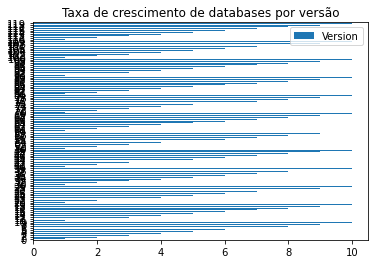

In [237]:
#growthData = {"Países": ["País1", "País2", "País3", "País4", "País5", "País6", "País7"],
databases=['DB1','DB2','DB3','DB4','DB5','DB6','DB7','DB8','DB9','DB10','DB11','DB12','DB13','DB14','DB15','DB16','DB17','DB18','DB19']

#"Taxa de Crescimento":[10,2, 7,5, 3,7, 2,1, 1,5, -1,7, -2,3]};

#dataFrame = pd.DataFrame(dados = crescimentoData);
plt.figure(figsize=(100,80))
#df4.plot.barh( title="Taxa de crescimento de diferentes países")
df4.plot(kind='barh', title="Taxa de crescimento de databases por versão")
plt.show()

In [225]:
#df4.groupby('DB1','DB2','DB3','DB4','DB5','DB6','DB7','DB8','DB9','DB10','DB11','DB12','DB13','DB14','DB15','DB16','DB17','DB18','DB19').sum()
df.groupby('Project').agg({'Version':lambda col: ', '.join(col)}).reset_index()

KeyError: 'Project'

In [195]:
#df4.index(1).str.startswith("PostgreSQL")
def num_missing(x):
   return sum (x == x)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#Retirando o COMMITS
df4.iloc[: , 1:].apply(num_missing, axis=1).sort_values(ascending=False)

119    20
118    20
31     20
32     20
33     20
       ..
84     20
85     20
86     20
87     20
0      20
Length: 120, dtype: int64

In [153]:
df2 = df.groupby('2').count()
#df2 = df["COMMITS"].sum().sort_values(ascending=False)
#df2.iloc[: , 1:] => para ocultar a linha COMMITS
df2.iloc[: , 1:].T

KeyError: '2'

<Figure size 14400x10800 with 0 Axes>

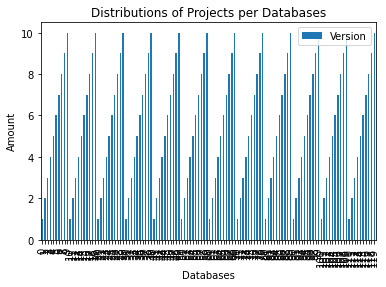

In [177]:
plt.figure(figsize=(200,150))
df4.plot(kind='bar', title = 'Distributions of Projects per Databases')
plt.xlabel("Databases")
plt.ylabel("Amount")
plt.show()

In [145]:
#df.iloc[: ,:].duplicated().count()
def num_missing(x):
   return sum(x notnull)
#df2.apply(num_missing, axis=0).sort_values(ascending=False)
#Retirando o COMMITS
#df4.iloc[: , 1:].values.all()
#apply(num_missing, axis=0).sort_values(ascending=False)

SyntaxError: invalid syntax (<ipython-input-145-050e549df1ba>, line 3)

In [137]:
X = df4.data
y = df4.target

AttributeError: 'DataFrame' object has no attribute 'data'

NameError: name 'X' is not defined

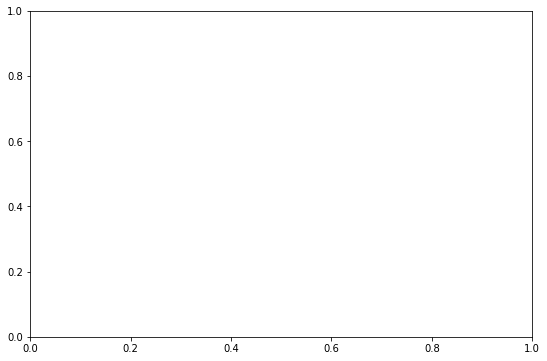

In [138]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(X)
plt.show()

In [76]:

#Algumas formas de iteração
valores =[]
for key, value in df2.iteritems():
    #if key.item == 1:
        print(key,value)
       
#print(valores)
for i in df2.itertuples():
    print(i)
columns = list(df2)
valores =[]
for key, value in df2.iteritems():
        #print (df[i][j])
    if key == "PROJECTS":
        print(value)
        
# printing the third element of the column

#(df['price'] < 50000).all()
coluna=[]
#for i in df2.iterrows():
for x in df2.columns:
    if x == "PROJECTS":
        linha=[]
        linha.append(df2[x])
    elif x == "COMMITS":
        linha.append(df2[x])
    elif (df2[x] == 1).bool:
            #print(df2[x])
        linha.append(x)
    coluna.append(linha)    
print('Acessando a coluna:',coluna)
    #Acessa o campo do dataframe
    #Remover o valor de cada campo
    #df[x] = df[x].apply(lambda x: x-30)
    valores = []
for linha in df2.itertuples():
    valores.append('sim' if df.items[linha] == 1 else 'não')
print (valores)
columns = list(df)
 
for i in columns:
 
    # printing the third element of the column
    print (df[i][2])

0      Activiti
1      Activiti
2      Activiti
3      Activiti
4      Activiti
         ...   
115     zaproxy
116     zaproxy
117     zaproxy
118     zaproxy
119     zaproxy
Name: PROJECTS, Length: 120, dtype: object
